In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import scipy.stats as st
from dateutil.relativedelta import relativedelta
import seaborn as sns

In [2]:
days = 4
delta = relativedelta(days = days)
days_col = np.arange(-days, days + 1, 1)


tgivings = [
    dt.date(2018, 11, 22),
    dt.date(2019, 11, 28), 
    dt.date(2020, 11, 26), 
    dt.date(2021, 11, 25), 
    dt.date(2022, 11, 24)
]
date_ranges = [[tgiving - delta, tgiving + delta + relativedelta(days = 1)] for tgiving in tgivings]

prices = pd.DataFrame(days_col)
prices.columns = ['days']


for date_range in date_ranges:
    tmp = yf.Ticker('ETH-USD')
    tmp = tmp.history(start=date_range[0], end=date_range[1], interval='1d')['High'].reset_index()
    tmp['days'] = days_col
    tmp = tmp[['days', 'High']]
    tmp.columns = ['days', str(date_range[0].year)]

    prices = pd.merge(prices, tmp, how='inner', on='days')
    
prices
#dates = returns_data.Date
#returns_data = returns_data.drop(columns='Date')

,days,2018,2019,2020,2021,2022
0,-4,179.151993,153.965912,579.372498,4422.491699,1224.077759
1,-3,177.179001,150.207962,609.987610,4302.022949,1142.395752
2,-2,151.253006,150.004761,621.173401,4385.483398,1136.442627
3,-1,138.889999,154.887207,605.094177,4376.875977,1184.997314
4,0,137.740005,156.613586,575.641479,4550.518066,1211.627441
5,1,127.028000,156.848404,530.777161,4550.842285,1203.799438
6,2,126.788002,156.691299,548.044861,4187.684082,1227.038086
7,3,118.880997,152.491928,576.602417,4297.916504,1220.349487
8,4,118.200996,152.116959,615.240540,4460.848633,1198.737671


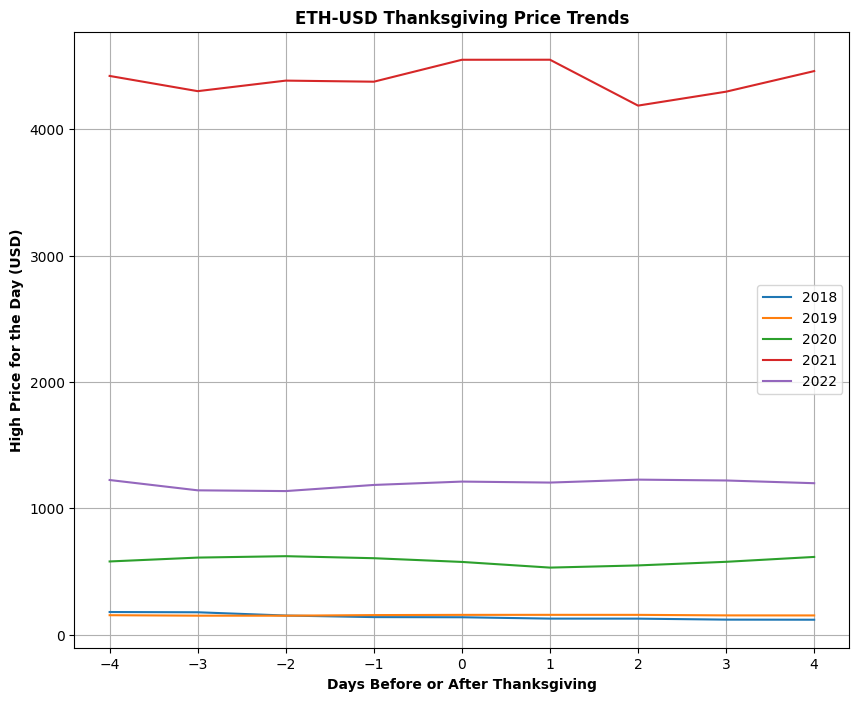

In [3]:
plt.figure(figsize=(10,8))

for i in range(1, len(tgivings) + 1):
    tmp = prices.iloc[:, [0, i]]
    year = tmp.columns[1]
    plt.plot(tmp.days, tmp.iloc[:,1], label=year)

plt.ylabel('High Price for the Day (USD)', fontweight='bold')
plt.xlabel('Days Before or After Thanksgiving', fontweight='bold')
plt.title('ETH-USD Thanksgiving Price Trends', fontweight='bold')
plt.legend()
plt.grid()
    
    